# Capstone Project(DS-UA 112)
## author: Derrick Lyu

## Preprocessing of data
1. Dimension Reduction:
    In the question that require preprocessing data with dimention reduction. I first acquired data that is necessary for the question, then z-scored it to normalize the data in each column to avoid variance cause by the difference of unit of measurement used in each column (although the unit used for each column are same across the dataset). Then, doing the PCA and making the scree plot while selecting Kaiser criterion allows me to discern the major compounded component that could be used.

2. Data Cleaning
    Since many people chose not to respond some question or did not watch some movies, there are a lot of "nan" value in the data set. Thus, it is necessary to do the data cleaning before doing the data analysis. In some question, especially those that require comparison between rating of two movies, I stacked two groups of data together and delete all the rows that contains "nan" value to avoid some confounding variable, like people chose to watch a movie a movie while not watching the other because it does not have their favorite actor. Also, when it comes to finding the correlation across many movies, I chose to fill all nan value by median rating of the movie since if I chose to delete all rows that have nan value, there will not enough data for analysis
    
3. Data Transformation
    As I mentioned in the dimension reduction, I used z-score to normalize the data and in come cases using PCA to combine data and rotate them into a new coordinate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from scipy.special import expit # this is the logistic sigmoid function
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataFrame = pd.read_csv("movieReplicationSet.csv",delimiter=",")
dataFrame.describe()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
count,76.000000,71.000000,453.000000,289.000000,463.000000,128.000000,182.000000,254.000000,137.000000,588.000000,...,1077.000000,1073.000000,1078.000000,1075.000000,1074.000000,1077.000000,1079.000000,1073.000000,1097.000000,1097.000000
mean,2.151316,2.021127,3.153422,2.707612,2.778618,2.597656,2.365385,2.899606,2.496350,2.911565,...,2.763231,3.100652,2.234694,4.446512,4.259777,3.319406,2.159407,1.253495,0.137648,0.533273
std,1.166247,1.141542,0.916403,1.153261,0.906993,1.019608,1.028468,1.062643,1.020914,0.969203,...,1.499884,1.462571,1.242105,1.254294,1.248493,1.246603,1.275058,0.447890,0.407743,0.542900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000
25%,1.000000,1.000000,3.000000,2.000000,2.500000,2.000000,1.500000,2.500000,2.000000,2.500000,...,1.000000,2.000000,1.000000,4.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,2.500000,2.000000,3.500000,3.000000,3.000000,3.000000,2.500000,3.000000,2.500000,3.000000,...,3.000000,3.000000,2.000000,5.000000,4.000000,3.000000,2.000000,1.000000,0.000000,1.000000
75%,3.000000,3.000000,4.000000,3.500000,3.500000,3.500000,3.000000,3.875000,3.000000,3.500000,...,4.000000,4.000000,3.000000,5.000000,5.000000,4.000000,3.000000,1.000000,0.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.000000,1.000000,1.000000


## Question 1
what is the relationship between sensation seeking and movie experience?

In [3]:
data = np.genfromtxt("movieReplicationSet.csv", skip_header=1, 
                             delimiter=",",usecols=[*range(400,420),*range(464,474)])
data = data[~np.isnan(data).any(axis=1)]
sensation = data[:,:20]
experience = data[:,20:30]
cor = np.corrcoef(data,rowvar=False)

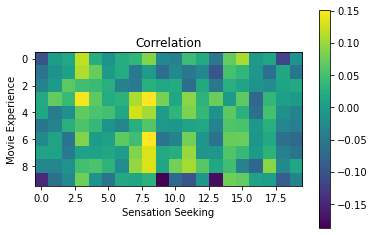

In [4]:
# Then we graph the correlation
plt.imshow(cor[20:30,:20])
plt.xlabel("Sensation Seeking")
plt.ylabel("Movie Experience")
plt.title("Correlation")
plt.colorbar()
plt.show()

In [5]:
#Doing PCA
pcaSensation = PCA().fit(stats.zscore(sensation))
pcaExperience = PCA().fit(stats.zscore(experience))

SeigVals = pcaSensation.explained_variance_
Sloadings = pcaSensation.components_*-1
SrotatedData = pcaSensation.fit_transform(stats.zscore(sensation))*-1
ScovarExplained = SeigVals/sum(SeigVals)*100

MeigVals = pcaExperience.explained_variance_
Mloadings = pcaExperience.components_*-1
MrotatedData = pcaExperience.fit_transform(stats.zscore(experience))*-1
McovarExplained = MeigVals/sum(MeigVals)*100

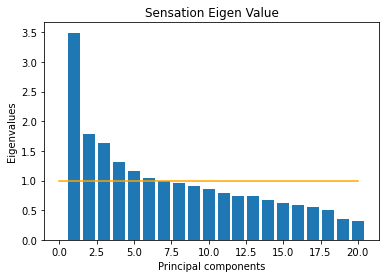

In [6]:
# Making a scree plot
numClasses = 20
x = np.linspace(1, numClasses, numClasses)
plt.bar(x, SeigVals)
plt.plot([0, numClasses],[1,1],color='orange')
plt.title("Sensation Eigen Value")
plt.xlabel('Principal components')
plt.ylabel('Eigenvalues')
plt.show()

In [7]:
kaiserThreshold = 1
threshold = 90
eigSum = np.cumsum(ScovarExplained)
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(SeigVals > kaiserThreshold))
print("Number of factors selected by Elbow Critetion: 11")
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)

Number of factors selected by Kaiser criterion: 6
Number of factors selected by Elbow Critetion: 11
Number of factors to account for at least 90% variance: 16


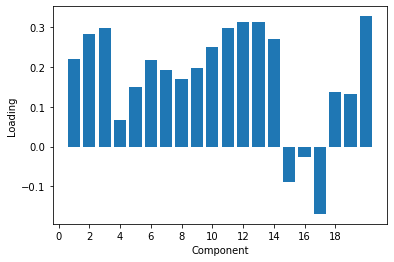

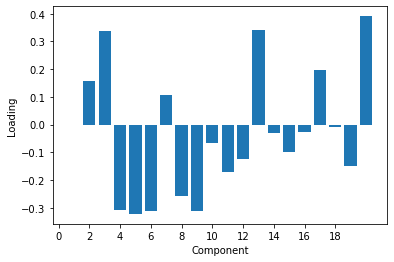

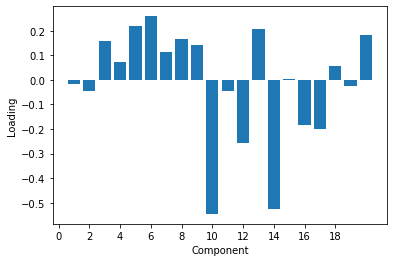

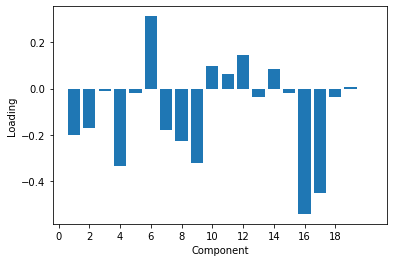

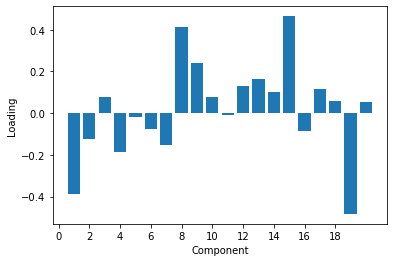

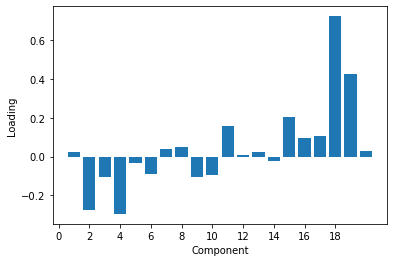

In [8]:
sensationHeading = np.genfromtxt("movieReplicationSet.csv", max_rows =1,dtype = str,
                             delimiter=",",usecols=[*range(400,420)])
for ii in range(6):
    plt.bar(x,Sloadings[ii,:]*-1)
    plt.xticks(np.arange(0,20,2))
    plt.xlabel("Component")
    plt.ylabel("Loading")
    plt.show()

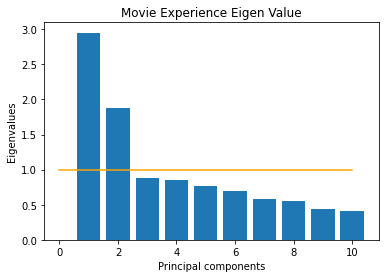

In [9]:
numClasses = 10
x = np.linspace(1, numClasses, numClasses)
plt.bar(x, MeigVals)
plt.plot([0, numClasses],[1,1],color='orange')
plt.title("Movie Experience Eigen Value")
plt.xlabel('Principal components')
plt.ylabel('Eigenvalues')
plt.show()

In [10]:
kaiserThreshold = 1
threshold = 90
eigSum = np.cumsum(McovarExplained)
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(MeigVals > kaiserThreshhold))
print("Number of factors selected by Elbow Critetion: 6")
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)

NameError: name 'kaiserThreshhold' is not defined

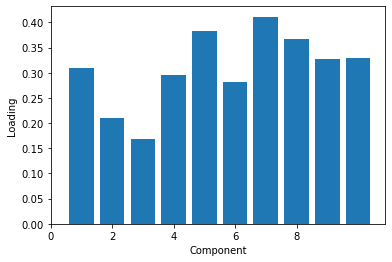

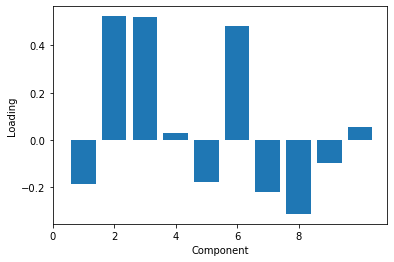

In [11]:
experienceHeading = np.genfromtxt("movieReplicationSet.csv", max_rows =1,
                             delimiter=",",usecols=[*range(464,474)])
for ii in range(2):
    plt.bar(x,Mloadings[ii,:]*-1)
    plt.xticks(np.arange(0,10,2))
    plt.xlabel("Component")
    plt.ylabel("Loading")
    plt.show()

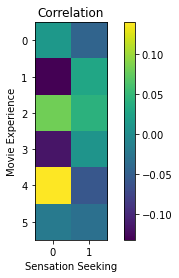

In [12]:
Sreduced = SrotatedData[:, :6]
Ereduced = MrotatedData[:, :2]

corr = np.corrcoef(Sreduced, Ereduced, rowvar=False)
plt.imshow(corr[:6,6:])
plt.xlabel("Sensation Seeking")
plt.ylabel("Movie Experience")
plt.title("Correlation")
plt.colorbar()
plt.show()

## Conclussion
Since, from the graph. the greatest correlation between the sensation seeking and movie experience does not exceed 0.15. They are weekly correlated. After we do the dimension reduction for both Sensation seeking and Movie Experience, we have found the primary compounded component for each, and then found that the correlation between them are still very low. Thus, we could further conclude that the sensation seeking and movie experience are weakly correlated

# Question 2 
Is there evidence of personality types based on the data of theses research participents? If so, characterize these types both quantitively and narratively.

In [13]:
#Import the Data
personality = np.genfromtxt("movieReplicationSet.csv", skip_header=1, 
                             delimiter=",",usecols=[*range(420,464)])
personality = personality[~np.isnan(personality).any(axis=1)]
cor = np.corrcoef(personality, rowvar= False)

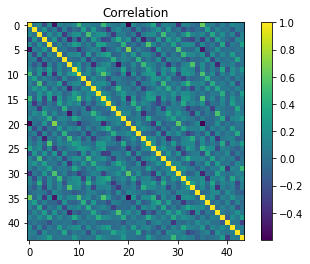

In [14]:
plt.imshow(cor)
plt.title("Correlation")
plt.colorbar()
plt.show()

In [15]:
#Doing PCA
pca = PCA().fit(stats.zscore(personality))
eigVals = pca.explained_variance_
loadings = pca.components_
rotatedData = pca.fit_transform(zscoredata)
varExplained = eigVals/sum(eigVals)*100

NameError: name 'zscoredata' is not defined

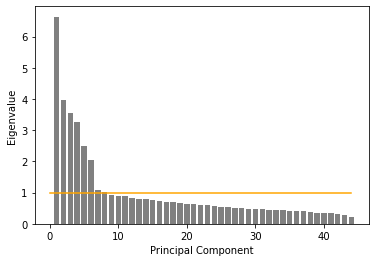

In [16]:
#Making a scree plot
num = 44
x = np.linspace(1,num,num)
plt.bar(x,eigVals,color="gray")
plt.plot([0,num],[1,1],color="orange")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.show()

In [17]:
kaiserThreshhold = 1
threshhold = 90
eigSum = np.cumsum(varExplained)
print("Number of factors selected by Kaiser Criterion: ",np.count_nonzero(eigVals > kaiserThreshhold))
print("Number of factors selected by Elbow Critetion: 9")
print("Number of factors to account for at least 90% variance: ", np.count_nonzero(eigSum<threshhold)+1)

NameError: name 'varExplained' is not defined

## Interpreting The factors
        - by using the Kaiser Criterion

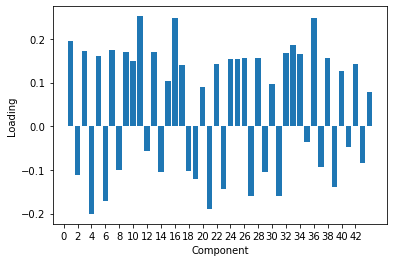

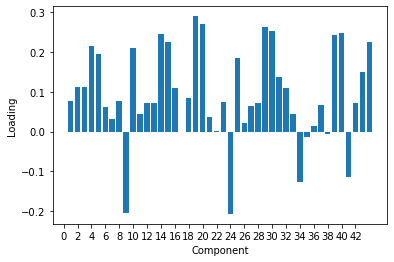

In [18]:
header = np.genfromtxt("movieReplicationSet.csv", max_rows= 1, dtype=str,
                             delimiter=",",usecols=[*range(420,464)])
#print(header)
for i in range(2):
    plt.bar(x,loadings[i,:]*-1)
    plt.xticks(np.arange(0,44,2))
    plt.xlabel("Component")
    plt.ylabel("Loading")
    plt.show()

In [19]:
# Understanding the Main component
print("Component 1: ")
print(header[10],", ", header[15],"," ,header[35])
print("Component 2: ")
print(header[18],", ", header[19], ", ", header[28], ", ",
      header[29], ", ", header[38])

Component 1: 
Is full of energy ,  Generates a lot of Enthusiasm , is outgoing/sociable
Component 2: 
Worries a lot ,  Has an active imagination ,  Can be moody ,  Values artistic/aesthetic experiences ,  Gets nervous easily


## Naming the main component
PC1: Optimistic , PC2: Emotional Fragile

In [20]:
# The actrual Clustering
x = np.column_stack((rotatedData[:,0],rotatedData[:,1]))
numClusters = 9 #loop from 2 to 10
sSum = np.empty([numClusters,1])*np.NaN
#Compute Kmeans for each k
for ii in range(2, numClusters+2): # Loop through each cluster (from 2 to 10)
    kMeans = KMeans(n_clusters = int(ii)).fit(x) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(x,cId) # compute the mean silhouette coefficient of all samples
    sSum[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(sSum[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot 

NameError: name 'rotatedData' is not defined

In [21]:
# Plot the sum of the silhouette scores as a function of the number of clusters, to make it clearer what is going on
plt.plot(np.linspace(2,numClusters,9),sSum)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

NameError: name 'numClusters' is not defined

## Choosing the K
From the graph, we can conlude that see 2 cluster is the optimal choice

In [22]:
# Now we determined the Optimal k we can now ask kMeans to cluster the data for us assuming that k
numClusters = 2
kMeans = KMeans(n_clusters = numClusters).fit(x) 
cId = kMeans.labels_ 
cCoords = kMeans.cluster_centers_ 

# Plot the color-coded data:
for ii in range(numClusters):
    plotIndex = np.argwhere(cId == int(ii))
    plt.plot(x[plotIndex,0],x[plotIndex,1],'o',markersize=2)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    plt.xlabel('Optimistic')
    plt.ylabel('Emotional Fragility')

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Conclusion
    By applying the dimension reduction and clustering, I can conclude that theire is evidence of personality type, which are positive and negative. People that are optismistic located at the right of the x=0, while the people that are pessimistic located at the left of the line x=0.

# Question 3
Are movies that are more popular rated higher than movies that are less popular?

In [25]:
#import Data
data = np.genfromtxt("movieReplicationSet.csv", skip_header = 1, usecols = [*range(400)],
                    delimiter = ",")
dataMean = np.nanmean(data, axis= 0)
popularity = []
for i in range(400):
    tempData = data[:,i]
    tempData = tempData[~np.isnan(tempData)]
    tempLen = len(tempData)
    popularity.append(tempLen)

In [26]:
#find min and max
minPop = np.amin(popularity)
maxPop = np.amax(popularity)
minIndex = np.where(popularity == minPop)
maxIndex = np.where(popularity == maxPop)
minData = data[:,249]
minData = minData[~np.isnan(minData)]
maxData = data[:,138]
maxData = maxData[~np.isnan(maxData)]

In [27]:
#using Paried t-test
minData = data[:,249]
maxData = data[:,138]
combinedData = np.stack((minData,maxData),axis=1)
combinedData = combinedData[~np.isnan(combinedData).any(axis=1)]
t1, p1 = stats.ttest_rel(combinedData[:,0],combinedData[:,1],alternative = "less")
print(p1)

4.0862919656097074e-05


Since, by using paired t-test, the p-value is also under 0.01, we can furder conclude that more popular movie are rated higher than less popular movie

In [28]:
#Doing Linear Regression
x = np.asarray(popularity).reshape(len(popularity),1)
y = dataMean
regModel = LinearRegression().fit(x,y)
yHat = regModel.coef_ * x + regModel.intercept_

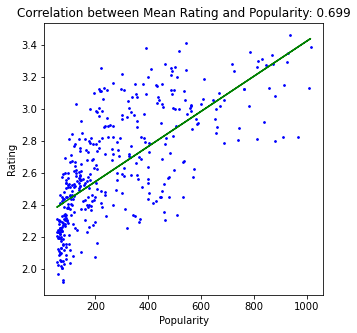

In [29]:
plt.figure(figsize=(5, 5))
plt.scatter(popularity, dataMean, color='blue',s=3)
plt.plot(x,yHat,"g")
plt.title('Correlation between Mean Rating and Popularity: {:.3f}'.format(np.corrcoef(popularity, dataMean)[0,1]))
plt.xlabel('Popularity')
plt.ylabel('Rating')
plt.show()

## Conclusion
By using the paired t-test, we can conclude that more popular movie are rated higher than less popular movie at confidence level of 0.99. Moreover, by reading outcomes from the correlation matrix, Linear regression model, as well as from the graph, we can see a clear positive correlation between popularity and rating.

# Question 4
Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

In [30]:
overallHeader = np.genfromtxt("movieReplicationSet.csv", dtype=str, max_rows=1,
                     delimiter=",")
def whichMovie(name):
    for ii in range(400):
        if name in overallHeader[ii]:
            return ii

In [31]:
# handle data 
shrek = whichMovie("Shrek (2001)")
data = np.genfromtxt("movieReplicationSet.csv",usecols=[shrek,474],skip_header=1,
                     delimiter=",")
data = data[~np.isnan(data).any(axis=1)]
male = []
female = []
for i in range(len(data)):
    if data[i,1] == 1:
        female.append(i)
    elif data[i,1] == 2:
        male.append(i)
maleData = data[male,0]
femaleData = data[female,0]

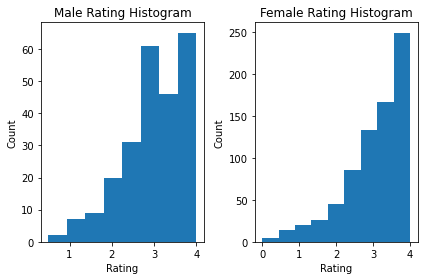

In [32]:
plt.subplot(1,2,1)
plt.hist(maleData, len(set(maleData)))
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Male Rating Histogram")

plt.subplot(1,2,2)
plt.hist(femaleData, len(set(femaleData)))
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Female Rating Histogram")

plt.tight_layout()
plt.show()

In [33]:
#using Mann-Whitney U
u,p = stats.mannwhitneyu(maleData, femaleData)
print(p)

0.050536625925559006


Since the underlying distribution is not equal as we have different male and female number, we chose to use Mann-Whitney U test. By using Mann-whitney U test, the p-value is aboe 0.05, we failed to reject the null hypothesis that there are no differnece between the rating of famale viewer and male viewer.

In [36]:
#using Welch's t-test
t1, p1 = stats.ttest_ind(maleData,femaleData,equal_var=False)
print(p1)

0.24834907946281018


Since, by using Welch t-test, the p-value is above 0.05, we failed to reject the null hypothesis that there are no differnece between the rating of famale viewer and more male viewer.

In [37]:
#using K-S test
s2, p2 = stats.kstest(maleData,femaleData)
print(p2)

0.05608204072286342


Since, by using KS Test, the p-value is above 0.05, we failed to reject the null hypothesis that there are no differnece between the rating of famale viewer and more male viewer.

# Conclusion
Since, by using U test and Welch's t-test and KS test, the p-value are all above 0.05, we failed to reject the null hypothesis that there are no differnece between the rating of famale viewer and male viewer.

# Question 5
Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

In [38]:
# handle data 
Lion = whichMovie("Lion")
data = np.genfromtxt("movieReplicationSet.csv",usecols=[Lion,475],skip_header=1,
                     delimiter=",")
data = data[~np.isnan(data).any(axis=1)]
onlyChild = []
notOnlyChild = []
for i in range(len(data)):
    if data[i,1] == 1:
        onlyChild.append(i)
    elif data[i,1] == 0:
        notOnlyChild.append(i)
onlyChildData = data[onlyChild,0]
notOnlyChildData = data[notOnlyChild,0]
print("Only Child Mean: ", np.mean(onlyChildData))
print("Not Only Child Mean: ", np.mean(notOnlyChildData))

Only Child Mean:  3.347682119205298
Not Only Child Mean:  3.481958762886598


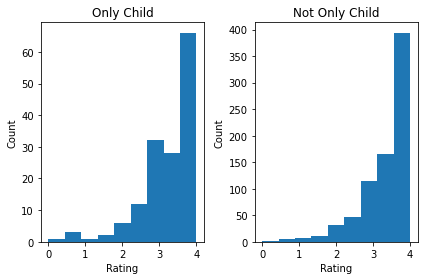

In [39]:
plt.subplot(1,2,1)
plt.hist(onlyChildData, len(set(onlyChildData)))
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Only Child")

plt.subplot(1,2,2)
plt.hist(notOnlyChildData, len(set(notOnlyChildData)))
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Not Only Child")

plt.tight_layout()
plt.show()

In [218]:
#using Mann-Whitney U
u,p = stats.mannwhitneyu(onlyChildData, notOnlyChildData,alternative = "greater")
print(p)

0.978419092554931


In [219]:
#using Welch's t-test
t1, p1 = stats.ttest_ind(onlyChildData,notOnlyChildData,equal_var=False, alternative = "greater")
print(p1)

0.9694855681322363


# Conclusion
Since, by using Mann-Whyney U test and Welch's t-test, the p-values are above 0.05, we can not reject the null hypothesis that people that are only child rated "The Lion King" less or equal than the people that have sibling.

# Question 6
Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than
those who prefer to watch them alone?

In [220]:
wolf = whichMovie("Wolf of Wall Street")
data = np.genfromtxt("movieReplicationSet.csv",usecols=[wolf,476],skip_header=1,
                     delimiter=",")
data = data[~np.isnan(data).any(axis=1)]
alone = []
notAlone = []
for i in range(len(data)):
    if data[i,1] == 1:
        alone.append(i)
    elif data[i,1] == 0:
        notAlone.append(i)
aloneData = data[alone,0]
notAloneData = data[notAlone,0]
print("Watch Alone Mean Rating: ", np.mean(aloneData), np.median(aloneData))
print("What Socially Mean Rating: ", np.mean(notAloneData), np.median(notAloneData))

Watch Alone Mean Rating:  3.143765903307888 3.5
What Socially Mean Rating:  3.033333333333333 3.0


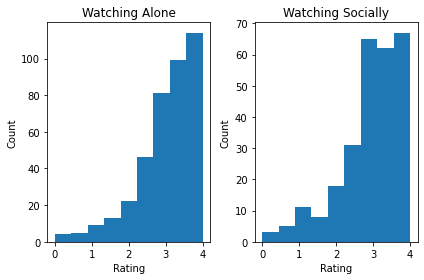

In [221]:
plt.subplot(1,2,1)
plt.hist(aloneData, len(set(aloneData)))
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Watching Alone")

plt.subplot(1,2,2)
plt.hist(notAloneData, len(set(notAloneData)))
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Watching Socially")

plt.tight_layout()
plt.show()

In [222]:
#using Mann-Whitney U
u,p = stats.mannwhitneyu(notAloneData, aloneData,alternative = "greater")
print(p)

0.9436657996253056


In [223]:
#using Welch's t-test
t1, p1 = stats.ttest_ind(notAloneData, aloneData,equal_var=False, alternative = "greater")
print(p1)

0.9393044802498963


## Conclusion
Since, by using Mann-Whyney U test and Welch's t-test, the p-values are above 0.05, we can not reject the null hypothesis that people watching "The Wolf of Wall Street" socially rated movie less or equal than the people watching alone.

# Question 7
There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’,
‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this
dataset. How many of these are of inconsistent quality, as experienced by viewers?

In [224]:
#Import Data
movieSet = ['Star Wars', "Harry Potter", "The Matrix", "Indiana Jones", "Jurassic Park", "Pirates of the Caribbean",
           'Toy Story', "Batman"]
data = np.genfromtxt("movieReplicationSet.csv",skip_header=1,
                     delimiter=",")
seriesMovie = []
for movie in movieSet:
    temp =[]
    for ii in range(400):
        if movie in overallHeader[ii]:
            #print(overallHeader[ii])
            temp.append(ii)
    seriesMovie.append(temp)

In [225]:
#Finding all p_value
p_value = []
for ii in range(len(movieSet)):
    tempData = data[:,seriesMovie[ii]]
    tempData = tempData[~np.isnan(tempData).any(axis=1)]
    if len(seriesMovie[ii])==6:
        tempH, tempP = stats.kruskal(tempData[:,0], tempData[:,1], tempData[:,2], tempData[:,3],
                                     tempData[:,4], tempData[:,5])
    elif (len(seriesMovie[ii])==3):
        tempH, tempP = stats.kruskal(tempData[:,0], tempData[:,1], tempData[:,2])
    else:
        tempH, tempP = stats.kruskal(tempData[:,0], tempData[:,1], tempData[:,2], tempData[:,3])
    p_value.append(tempP)

In [226]:
inconsistentMovie =[]
for ii in range(len(movieSet)):
    print("p-value of", movieSet[ii], "is:", p_value[ii])
    if(p_value[ii]<0.05):
        inconsistentMovie.append(movieSet[ii])
print("Inconsistent Movie:",len(inconsistentMovie))
print(inconsistentMovie)

p-value of Star Wars is: 6.940162236984522e-40
p-value of Harry Potter is: 0.11790622831256074
p-value of The Matrix is: 1.7537323830838066e-09
p-value of Indiana Jones is: 1.020118354785894e-11
p-value of Jurassic Park is: 1.8492328391686058e-11
p-value of Pirates of the Caribbean is: 0.035792727694248905
p-value of Toy Story is: 7.902234665149812e-06
p-value of Batman is: 4.1380499020034183e-19
Inconsistent Movie: 7
['Star Wars', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman']


# Conclusion
According to the p-value by using kruskal-Wallis test, we can conclude that there are 7 movies, including 'Star Wars', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman', do not have consistent quality.

# Question 8
Build a prediction model of your choice (regression or supervised learning) to predict movie
ratings (for all 400 movies) from personality factors only. Make sure to use cross-validation
methods to avoid overfitting and characterize the accuracy of your model.

In [236]:
#%% PreProcessingData
movieData = np.genfromtxt("movieReplicationSet.csv",skip_header=1,
                     delimiter=",")
#oldMedian = np.nanmedian(movieData,axis=0)
for ii in range(477):
    tempMedian = np.nanmedian(movieData[:,ii])
    tempNan = np.isnan(movieData[:,ii])
    movieData[tempNan,ii] = tempMedian

In [237]:
#%% Doing Linear Regression for each Movie
predictor = movieData[:,np.arange(420,464)]
predicted = movieData[:,np.arange(400)]
x_train, x_test, y_train, y_test = train_test_split(predictor,predicted, test_size=0.25,random_state=100)


models = []
rmse = []
r_sq = []

for ii in range(400):
    tempTrainY = y_train[:,ii]
    tempTestY = y_test[:,ii]
    
    model = LinearRegression().fit(x_train,tempTrainY)
    tempR_sq = model.score(x_train,tempTrainY)
    pred = model.predict(x_test)
    temp_RMSE = mean_squared_error(tempTestY, pred)
    
    rmse.append(temp_RMSE)
    models.append(model)
    r_sq.append(tempR_sq)
    
print("Mean of RMSE:", np.mean(rmse))
print("Median of RMSE:", np.median(rmse))
print("Mean of R Squre", np.mean(r_sq))
print("Median of R Square", np.median(r_sq))

Mean of RMSE: 0.3165094470956381
Median of RMSE: 0.26426768127893213
Mean of R Squre 0.08196191562584448
Median of R Square 0.080737162198742


In [239]:
#%%#Doing Linear Regression for the data set using mean rating for each person
predictor = movieData[:,np.arange(420,464)]
predicted = movieData[:,np.arange(400)]
predicted = np.mean(predicted, axis=1)
x_train, x_test, y_train, y_test = train_test_split(predictor,predicted, test_size=0.25,random_state=100)

overallModel = LinearRegression().fit(x_train,y_train)
tempR_sq = overallModel.score(x_train,y_train)
pred = overallModel.predict(x_test)
temp_RMSE = mean_squared_error(y_test, pred)

b0, b1 = overallModel.coef_, overallModel.intercept_
print("The coeaficient of each variable:", b0)
print("The intercept of each variable", b1)

The coeaficient of each variable: [ 7.73867000e-03  6.48376757e-03  8.94672775e-03 -1.10743301e-02
 -8.17117186e-03  5.18743761e-03  8.42721535e-03  5.71538645e-03
 -7.04668826e-03  1.28221280e-02  3.12515285e-04 -3.20459767e-03
 -1.05698613e-02 -1.00051564e-02  8.72672112e-03  4.43521989e-04
  8.86032856e-03  1.49333944e-02 -3.69599829e-03  6.34640540e-03
 -8.23951843e-03  1.42256893e-03  1.71066639e-02  1.54202303e-02
  8.53798289e-03  8.85820412e-03  9.39403249e-03  2.70157902e-02
  1.83658546e-02  8.94584742e-03  2.26322304e-02  9.74866015e-03
  2.15247275e-03  5.33342250e-03  8.64556332e-03 -7.98178098e-05
 -2.11812567e-03  9.99601334e-03  1.49433620e-02  4.63686966e-03
  8.38494584e-03  2.16553165e-02  3.10216345e-03 -8.43731684e-03]
The intercept of each variable 1.8807023532833076


## Conclusion
By looking at the mean and median of RMSE and R squre, prediction models for each movie works great.

# Question 9
Build a prediction model of your choice (regression or supervised learning) to predict movie
ratings (for all 400 movies) from gender identity, sibship status and social viewing preferences (columns 475-477) only. Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

In [73]:
#Preprocessing Data
predictor = movieData[:,np.arange(474,477)]
predicted = movieData[:,np.arange(400)]
x_train, x_test, y_train, y_test = train_test_split(predictor,predicted, test_size=0.25,random_state=100)
numTrees=100
models= []
MAE = []
MSE = []
RMSE = []

In [74]:
#Doing Random Forest
for ii in range(400):
    tempTrainY = y_train[:,ii]
    tempTestY = y_test[:,ii]
    
    regressor = RandomForestRegressor(n_estimators=numTrees, random_state=0).fit(x_train,tempTrainY) #bagging numTrees trees
    pred = regressor.predict(x_test)

    temp_MAE = metrics.mean_absolute_error(tempTestY, pred)
    temp_MSE = metrics.mean_squared_error(tempTestY, pred)
    temp_RMSE = np.sqrt(metrics.mean_squared_error(tempTestY, pred))
    
    models.append(regressor)
    MAE.append(temp_MAE)
    MSE.append(temp_MSE)
    RMSE.append(temp_RMSE)



print("Mean of RMSE:", np.mean(RMSE))
print("Median of RMSE:", np.median(RMSE))
print("Mean of MAE", np.mean(MAE))
print("Median of MAE", np.median(MAE))

Mean of RMSE: 0.5220473174267202
Median of RMSE: 0.4982776555932354
Mean of MAE 0.2573993546509414
Median of MAE 0.20888007346956933


## Conclusion
Since these three predictor variables are categorical data, it would be inappropriate to using the linear regression here. Thus, I chose to use decision tree to predict the output. Furthermore, to avoid overfitting and generate a larger power, I chose to use the random Forest Regression. By doing the randome forest regression and reviewing the mean and median of RMSE and R squre, the prediction models for each movie works great.

# Question 10
Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from all available factors that are not movie ratings (columns 401- 477). Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

In [180]:
#Preprocessing Data
predictor = movieData[:,np.arange(400,477)]
predicted = movieData[:,np.arange(400)]
x_train, x_test, y_train, y_test = train_test_split(predictor,predicted, test_size=0.25,random_state=100)
numTrees=100
models= []
MAE = []
MSE = []
RMSE = []

In [181]:
#Doing Random Forest
for ii in range(400):
    tempTrainY = y_train[:,ii]
    tempTestY = y_test[:,ii]
    
    regressor = RandomForestRegressor(n_estimators=numTrees, random_state=0).fit(x_train,tempTrainY) #bagging numTrees trees
    pred = regressor.predict(x_test)

    temp_MAE = metrics.mean_absolute_error(tempTestY, pred)
    temp_MSE = metrics.mean_squared_error(tempTestY, pred)
    temp_RMSE = np.sqrt(metrics.mean_squared_error(tempTestY, pred))
    
    models.append(regressor)
    MAE.append(temp_MAE)
    MSE.append(temp_MSE)
    RMSE.append(temp_RMSE)

print("Mean of RMSE:", np.mean(RMSE))
print("Median of RMSE:", np.median(RMSE))
print("Mean of MAE", np.mean(MAE))
print("Median of MAE", np.median(MAE))

Mean of RMSE: 0.5313514332935182
Median of RMSE: 0.510226487716471
Mean of MAE 0.2911856837121212
Median of MAE 0.24707272727272728


## Conclusion
Since three predictor variables are categorical data, it would be inappropriate to using the linear regression here. Thus, I chose to use decision tree to predict the output. Furthermore, to avoid overfitting and generate a larger power, I chose to use the random Forest Regression. By doing the randome forest regression and reviewing the mean and median of RMSE and R squre, the prediction models for each movie works great.By looking at the mean and median of RMSE and R squre, prediction models for each movie works great.